# Warsztaty modelowania w nanofizyce
----
## Wizualizacja struktur atomowych

**Paweł T. Jochym**

Zakład komputerowych badań materiałów

Instytut Fizyki Jądrowej PAN, Kraków

---
Wszelkiego rodzaju wizualizacje sa niezwykle ważnym elaementem pracy badawczej. 
* Pozwalają na efektywną kontrolę poprawności obliczeń
* Ułatwiaja dostrzeżenie pojawiających się trendów/zjawisk
* Pozwalają na wydobycie trudnych do zauważenia zależności w wynikach
* Ułatwiają i czynią przystępnym przekaz zawarty w ostatecznej publikacji

Niestety także:
* Są czaso- i praco-chłonne 
* Wymagają umiejętnego wykonania aby zachować estetykę, czytelność
* Bywają mylące - niepostrzeżenie wzmacniając efekty o małej wadze 

Poniższe ćwiczenia prezentują proste techniki tworzenia struktur atomowych (klastrów, kryształów, powierzchni) oraz wizualizacji uzyskanych układów. Istnieją liczne narzędzia służące do tego celu. Wiele z nich pozwala tworzyć wyrafinowane i piękne wizualizacje. Tutaj przedstawione są jedynie techniki możliwe do zastosowania w środowisku Jupyter na obecnym etapie jego rozwoju.

### Tworzenie struktury

Zdefiniowanie struktury wymaga podania jej składu atomowego oraz pozycji jej składników. W przypadku struktur krystalicznych powinniśmy także określić ich symeterię oraz rozmiar i rodzaj ich komórki elementarnej.

Zacznijmy od jednej z najprostszych struktur krystalicznych. Zbudujmy komórkę krystaliczną diamentu.

In [26]:
# Import potrzebnych modułów
from ase.build import bulk
from ase.lattice.spacegroup import crystal
import ase.io
from IPython.core.display import Image
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from io import BytesIO

In [33]:
diament=bulk(name='C',crystalstructure='diamond',a=4,cubic=True)

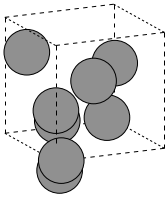

In [49]:
# Zapis obrazu kryształu na dysk
ase.io.write('diament.png',       # Nazwa pliku
             diament,             # obiekt zawierający definicję struktury
             show_unit_cell=2,    # Rysowanie komórki elementarnej
             rotation='115y,15x', # Obrót 115st wokół osi Y i 15st wokół osi X
             scale=30)            # Skala

# Wyświetlamy
Image(filename='diament.png')

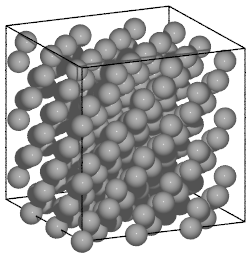

In [35]:
# Narysujmy większy fragment struktury
bdiament=diament.repeat(3)
ase.io.write('diament.pov', bdiament, show_unit_cell=2, rotation='115y,15x', run_povray=True)
Image(filename='diament.png')

In [36]:
a=4.3596                                         # Stała sieci w Angstromach
SiC = crystal(['Si', 'C'],                       # Lista pierwiastków w krysztale
                [(0, 0, 0), (0.25, 0.25, 0.25)], # Pozycje atomów (jako ułamki stałych sieci)
                spacegroup=216,                  # Numer grupy symetrii (216 = Blenda Cynkowa = F-43m)
                cellpar=[a, a, a, 90, 90, 90])   # Komórka elementarna (a, b, c, alpha, beta, gamma)

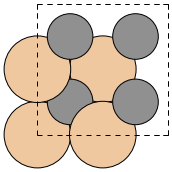

In [41]:
# Interakcja
@interact(x=(0.0,180),y=(0.0,180),c=fixed(SiC))
def show_cryst(x,y,c):
    f=BytesIO()
    ase.io.write(f, c, show_unit_cell=2, format='png',
                 rotation='%.0fy,%.0fx' % (y,x), scale=30) 
    return Image(data=bytes(f.getbuffer()),format='png')

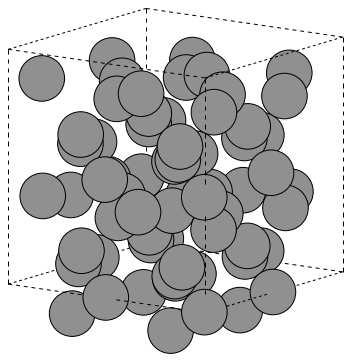

In [51]:
# Bardziej złożone struktury


interact(show_cryst,x=(0.0,180),y=(0.0,180),c=fixed(diament))